### End-to-End Development of ML Application

In [2]:
import pandas as pd
import numpy as np
import warnings
import mlflow
import os

from dotenv import load_dotenv
from sklearn.model_selection import train_test_split

In [3]:
load_dotenv()

mlflow.set_tracking_uri(os.environ["MLFLOW_TRACKING_URI"])
mlflow.set_experiment(experiment_name=os.environ["EXPERIMENT_NAME"])

2024/12/16 16:46:12 INFO mlflow.tracking.fluent: Experiment with name 'heart-condition-classifier' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:C:/demonstrations/mlruns/1', creation_time=1734347772807, experiment_id='1', last_update_time=1734347772807, lifecycle_stage='active', name='heart-condition-classifier', tags={}>

In [4]:
warnings.simplefilter("ignore")
data_file = "./data.csv"
df = pd.read_csv(data_file)

In [5]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.shape

(44, 14)

In [8]:
df["thal"] = df["thal"].astype("category").cat.codes

In [9]:
df["thal"].unique()

array([0, 1, 2], dtype=int8)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("target", axis=1),
    df["target"],
    test_size=0.1)

In [11]:
X_train.shape

(39, 13)

In [12]:
X_test.shape

(5, 13)

In [15]:
mlflow.xgboost.autolog()

In [16]:
from xgboost import XGBClassifier

In [17]:
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss")

In [18]:
run = mlflow.start_run()

In [19]:
model.fit(X_train, y_train,
          eval_set=[(X_test, y_test)],
          verbose=True)

[0]	validation_0-logloss:0.62448
[1]	validation_0-logloss:0.55603
[2]	validation_0-logloss:0.54513
[3]	validation_0-logloss:0.53589
[4]	validation_0-logloss:0.50230
[5]	validation_0-logloss:0.43518
[6]	validation_0-logloss:0.41028
[7]	validation_0-logloss:0.40013
[8]	validation_0-logloss:0.35942
[9]	validation_0-logloss:0.34204
[10]	validation_0-logloss:0.33128
[11]	validation_0-logloss:0.32736
[12]	validation_0-logloss:0.30075
[13]	validation_0-logloss:0.30285
[14]	validation_0-logloss:0.29844
[15]	validation_0-logloss:0.28077
[16]	validation_0-logloss:0.27812
[17]	validation_0-logloss:0.25992
[18]	validation_0-logloss:0.25537
[19]	validation_0-logloss:0.24069
[20]	validation_0-logloss:0.24415
[21]	validation_0-logloss:0.23267
[22]	validation_0-logloss:0.22248
[23]	validation_0-logloss:0.22535
[24]	validation_0-logloss:0.21803
[25]	validation_0-logloss:0.21305
[26]	validation_0-logloss:0.20546
[27]	validation_0-logloss:0.19737
[28]	validation_0-logloss:0.20072
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, recall_score

In [22]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [23]:
print(f"Accuracy : {accuracy}, Recall: {recall}")

Accuracy : 1.0, Recall: 1.0


In [24]:
mlflow.end_run()

🏃 View run rare-frog-942 at: http://localhost:5000/#/experiments/1/runs/5e411905a21a43579b8bf2f61fdb7258
🧪 View experiment at: http://localhost:5000/#/experiments/1


In [25]:
run.info.run_id

'5e411905a21a43579b8bf2f61fdb7258'

In [28]:
run = mlflow.get_run(run.info.run_id)
client = mlflow.tracking.MlflowClient()
file_path = mlflow.artifacts.download_artifacts(
    run_id=run.info.run_id,
    artifact_path="feature_importance_weight.png")

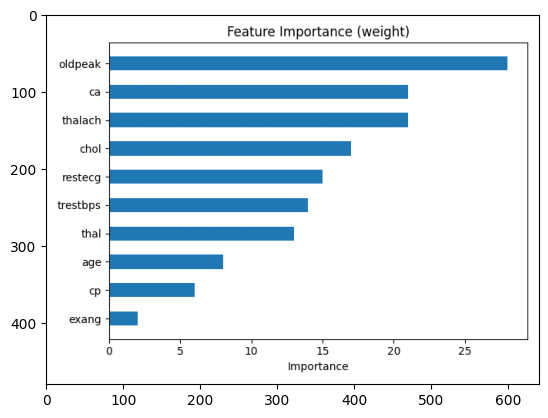

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread(file_path)
plt.imshow(image)
plt.show()